# Conclusions
## Dataset Overview:

The training data contains 90,000 examples and 53 feature columns.
There are no null values in the dataset.
The target variable ranges from 0 to 100.
All features, except for Feature 6, have positive values and are less than 500, with some features having a maximum of approximately 15.
## Feature Correlation:

Features are not highly correlated with each other or with the target variable.
The only pair of features with high correlation is Feature 6 and Feature 8, with a correlation coefficient of 0.94. Other correlations are around 0.
## Feature Distribution:

The distribution of all features and the target variable appears uniform, except for Feature 6, which shows a strong separation between low and high values, with few values in the middle. Feature 8 exhibits a strictly bimodal distribution.
## Predictor Analysis:

When plotting all features against the target, except for Features 6 and 8, the results appear to be random uniform noise.
Feature 6 has a strictly quadratic relationship with the target, while Feature 8 produces two straight lines when plotted. However, since Feature 8 has only binary values, it offers limited predictive power.
Modeling Results:

A sample polynomial regression on Feature 6 indicates a perfect fit to the data, confirming the hypothesis regarding its predictive capacity
Test data for predictor 6 follows the same distribution as the train data.

In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures


## Dataset Overview

In [31]:


train = pd.read_csv('./data/train.csv')


print("Dataset shape:", train.shape)
print("Null values in each column:\n", train.isnull().sum())
print(train.head())


print("Minimum values:\n", train.min())
print("Maximum values:\n", train.max())


print("Target min:", train['target'].min())
print("Target max:", train['target'].max())


Dataset shape: (90000, 54)
Null values in each column:
 0         0
1         0
2         0
3         0
4         0
5         0
6         0
7         0
8         0
9         0
10        0
11        0
12        0
13        0
14        0
15        0
16        0
17        0
18        0
19        0
20        0
21        0
22        0
23        0
24        0
25        0
26        0
27        0
28        0
29        0
30        0
31        0
32        0
33        0
34        0
35        0
36        0
37        0
38        0
39        0
40        0
41        0
42        0
43        0
44        0
45        0
46        0
47        0
48        0
49        0
50        0
51        0
52        0
target    0
dtype: int64
     0    1    2    3    4    5         6         7  8    9  ...         44  \
0  236  488   16  221  382   97 -4.472136  0.107472  0  132  ...  13.340874   
1  386  206  357  232    1  198  7.810250  0.763713  1  143  ...  12.484882   
2  429   49  481  111  111  146  8.602325  0.6

##  Correlation matrix

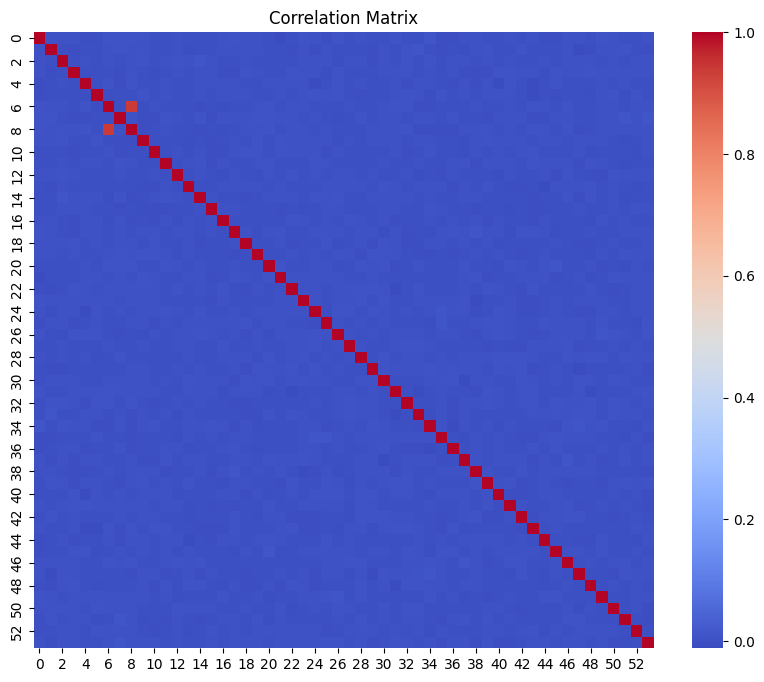

In [32]:

plt.figure(figsize=(10, 8))
correlation_matrix = train.corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


## Distributions of features

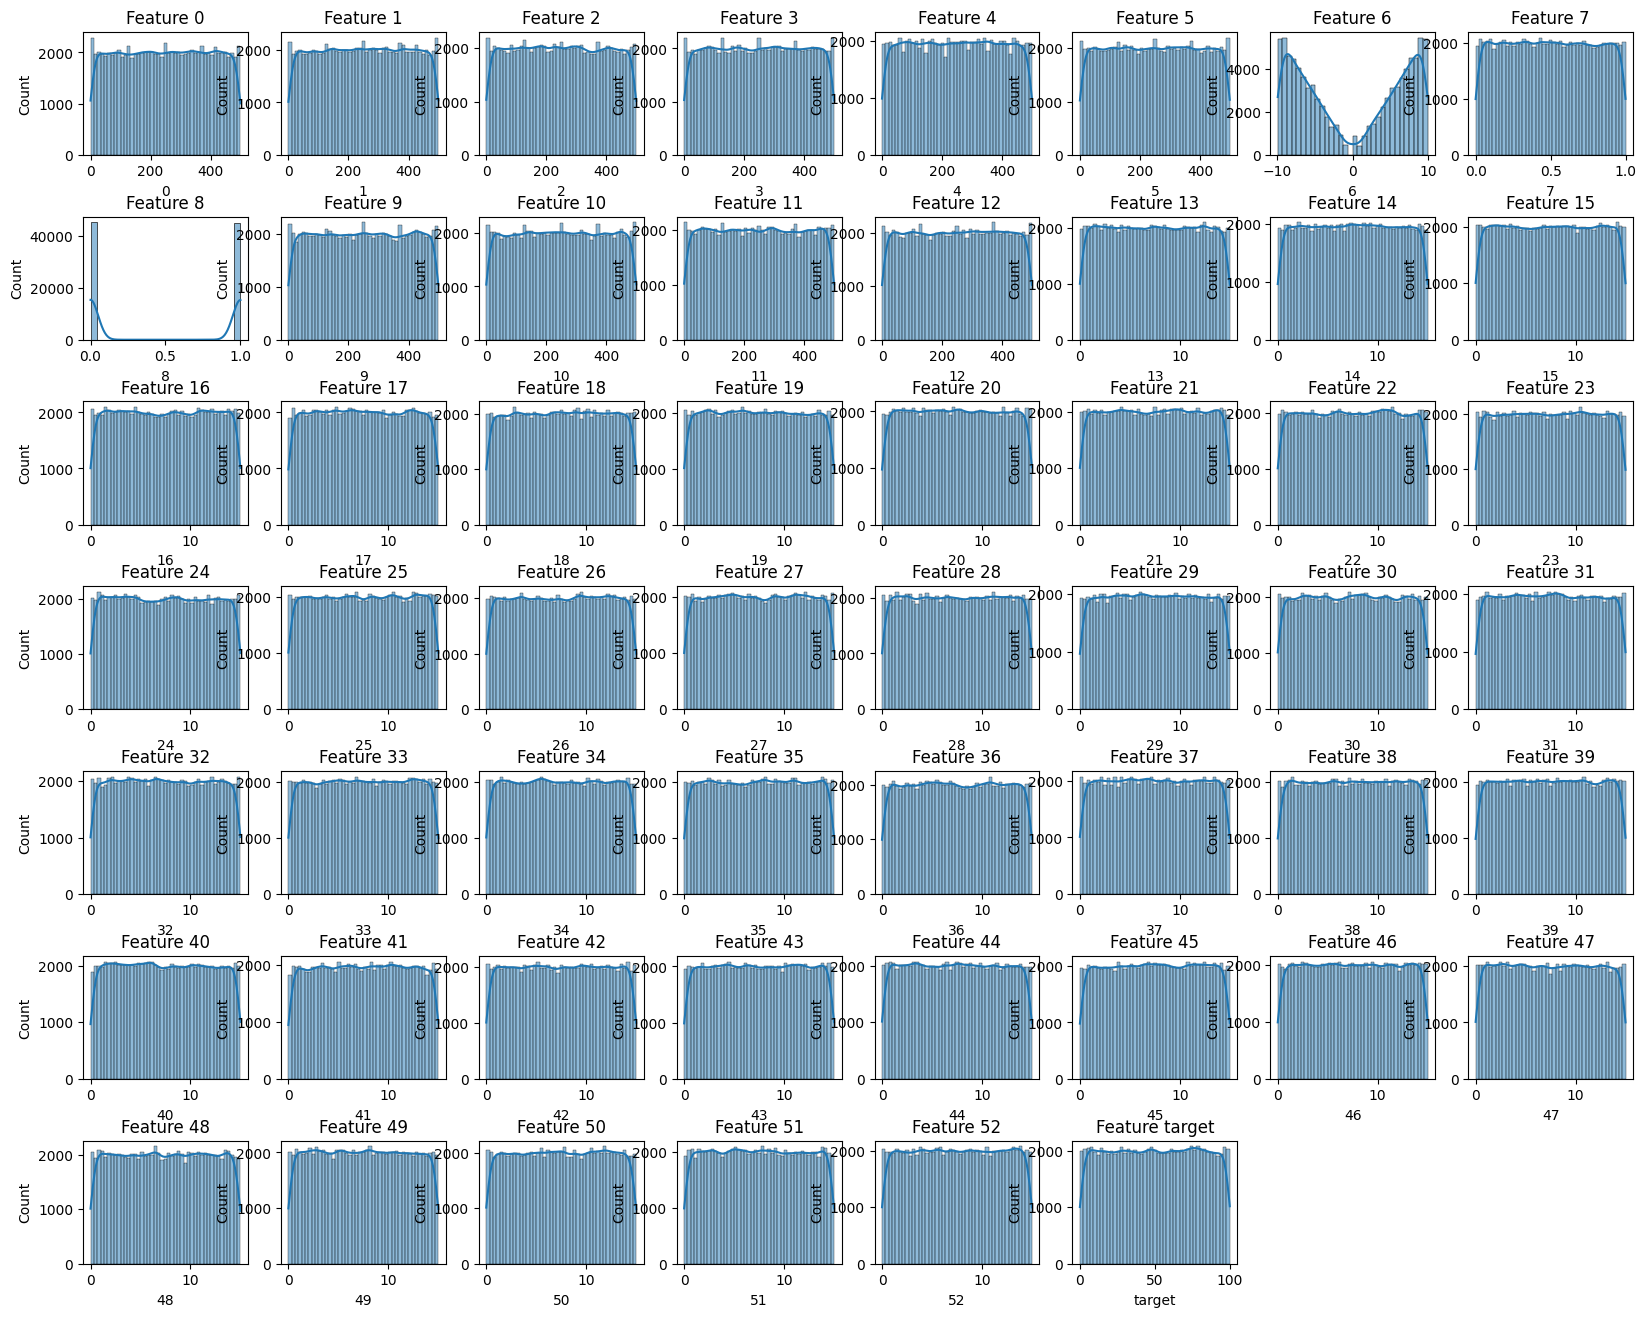

In [33]:

fig, axes = plt.subplots(7, 8, figsize=(20, 16))
fig.subplots_adjust(hspace=0.5)
axes = axes.flatten()

for i, col in enumerate(train.columns):
    sns.histplot(train[col], ax=axes[i], kde=True)
    axes[i].set_title(f'Feature {col}')

for i in range(len(train.columns), len(axes)):
    fig.delaxes(axes[i])

plt.show()


## Features against target

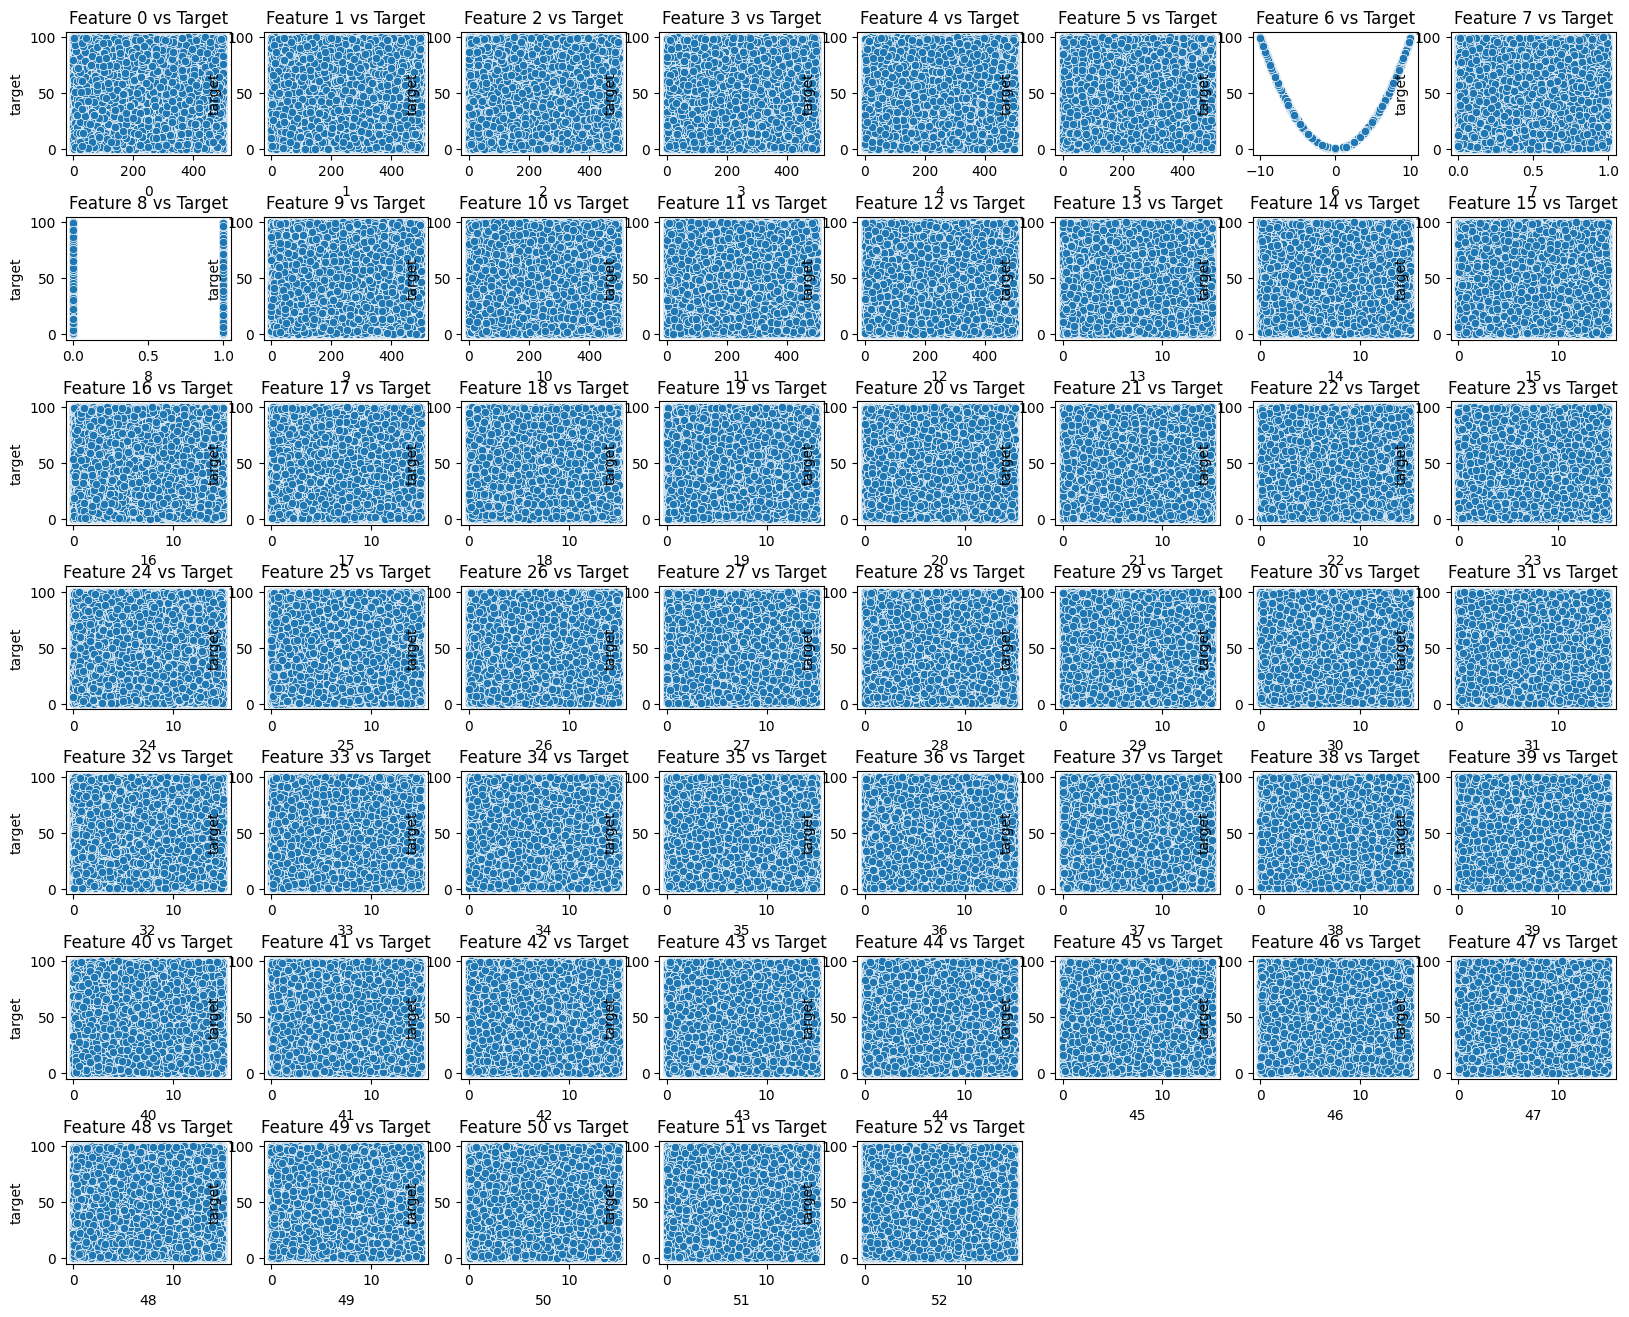

In [34]:


fig, axes = plt.subplots(7, 8, figsize=(20, 16))
fig.subplots_adjust(hspace=0.5)
axes = axes.flatten()

for i, col in enumerate(train.columns[:-1]):  
    sns.scatterplot(x=train[col], y=train['target'], ax=axes[i])
    axes[i].set_title(f'Feature {col} vs Target')

for i in range(len(train.columns)-1, len(axes)):
    fig.delaxes(axes[i])

plt.show()


## Fit polynomial regression model using Feature 6

In [35]:

model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
X = train[['6']]
y = train['target']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)


y_val_pred = model.predict(X_val)
y_full_pred = model.predict(X)

residuals = y - y_full_pred



## Plot 1: Predicted vs True values for the validation set


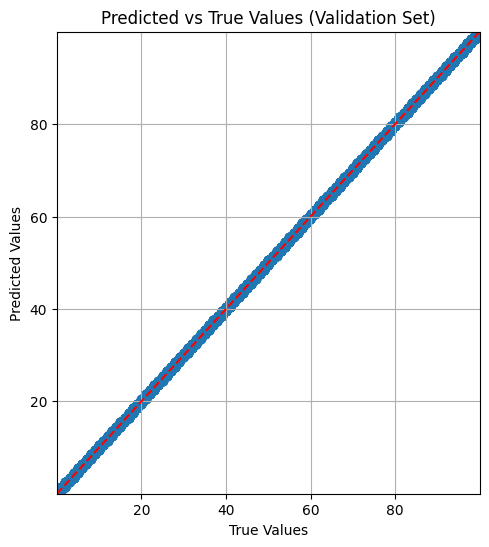

In [36]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_val, y_val_pred, alpha=0.7)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--')  # 45-degree line
plt.title('Predicted vs True Values (Validation Set)')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.xlim([y_val.min(), y_val.max()])
plt.ylim([y_val.min(), y_val.max()])
plt.grid()



## Plot 2: Residuals vs Fitted values for the entire dataset

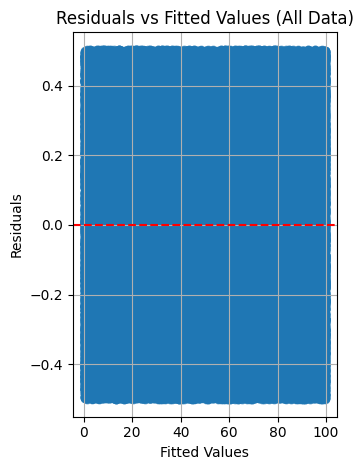

In [37]:
plt.subplot(1, 2, 2)
plt.scatter(y_full_pred, residuals, alpha=0.7)
plt.axhline(0, color='r', linestyle='--')
plt.title('Residuals vs Fitted Values (All Data)')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.grid()

plt.tight_layout()
plt.show()

## Check for test data distribution

<Axes: ylabel='Density'>

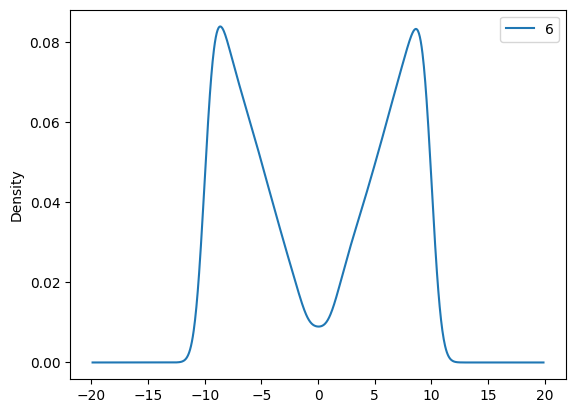

In [38]:
train[['6']].plot(kind='kde')

<Axes: ylabel='Density'>

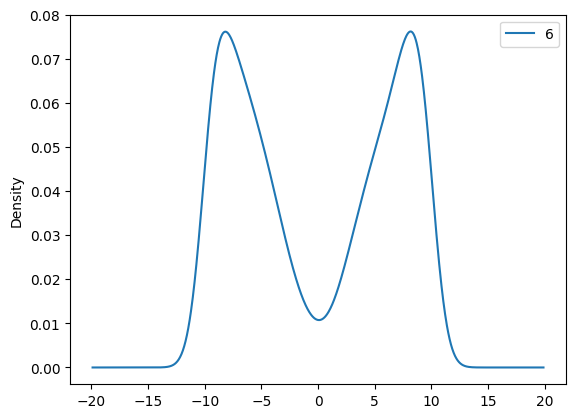

In [39]:
test = pd.read_csv('./data/hidden_test.csv')
test[['6']].plot(kind='kde')